It will be useful to set a global variable to the Relate binaries.<br/>
If on linux:

In [ ]:
%env PATH_TO_RELATE=./relate_v1.1.9_x86_64_static/

If on Mac:

In [2]:
%env PATH_TO_RELATE=relate_v1.1.9_MacOSX_Intel/

env: PATH_TO_RELATE=relate_v1.1.9_MacOSX_Intel/


# Relate practical: Using genealogies for population genetics

Leo Speidel <br/>
Genetics Institute, University College London, London, UK <br/>
Francis Crick Institute, London, UK <br/>
Contact: leo.speidel@outlook.com

In this practical, we will infer genealogies for a subset the Simons Genome Diversity Project dataset (Mallick et al, Nature 2016).<br/>
This dataset comprises whole-genome sequencing data of 278 modern humans with sampling locations shown in Fig. 1.

![SGDP](./figures/SGDP_map.png)

<div class="alert alert-block alert-info">
The data was downloaded from:<ul>
<li> <a href="https://sharehost.hms.harvard.edu/genetics/reich_lab/sgdp/phased_data/PS2_multisample_public">Phased genotypes</li>
<li> <a href="https://reichdata.hms.harvard.edu/pub/datasets/sgdp/filters/all_samples/">Genomic mask</a> </li>
<li> <a href="ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase1/analysis_results/supporting/ancestral_alignments/">Human ancestral genome</a> </li>
<li> <a href="https://mathgen.stats.ox.ac.uk/impute/1000GP_Phase3.html">Recombination maps</a></li>
</ul>
</div>

## Relate

Relate can be used to estimate the joint genealogies of many thousands of individuals genome-wide. These describe how individuals are related through their most-recent common ancestors back in time.

The output of Relate is a sequence of binary trees, each describing the genealogical relationships
locally in that part of the genome. Neighbouring genealogical trees differ because of recombination
events that change the genetic relationships of individuals.

<div class="alert alert-block alert-info">
A detailed documentation for Relate is available at <a href="https://myersgroup.github.io/relate">https://myersgroup.github.io/relate</a>.
    
Details about the method are published in:
<ul>
<li> L. Speidel, M. Forest, S. Shi, S. R. Myers. A method for genome-wide genealogy estimation
for thousands of samples. Nature Genetics 51, 1321-1329 (2019). </li>
<li> Leo Speidel, Lara Cassidy, Robert W. Davies, Garrett Hellenthal, Pontus Skoglund, Simon
R. Myers. Inferring population histories for ancient genomes using genome-wide genealogies.
Molecular Biology and Evolution 38, 3497-3511 (2021) </li>
</ul>
</div>

## Preparing the data

We will run Relate on a subset of the SGDP data set. We choose one individual from each population label within Africa, resulting in a total of 19 individuals. Here is a map of sampling locations and coloured by language family spoken.<br/>
<img src="./figures/SGDP_Africa.png" alt="SGDP_Africa" width="400"/>

### Step 1: Convert data from vcf to haps/sample

We start with converting the vcf file into haps/sample format used by Relate.

In [3]:
%%bash
${PATH_TO_RELATE}/bin/RelateFileFormats --mode ConvertFromVcf \
                                        -i worksheet_data/SGDP_Africa_chr15 \
                                        --haps SGDP_Africa_chr15.haps \
                                        --sample SGDP_Africa_chr15.sample
gzip -f SGDP_Africa_chr15.haps
gzip -f SGDP_Africa_chr15.sample

---------------------------------------------------------
Converting vcf file format to haps/sample file format..
Output written to SGDP_Africa_chr15.haps and SGDP_Africa_chr15.sample.
CPU Time spent: 3.070670s; Max Memory usage: 2.98598Mb.
---------------------------------------------------------



In [5]:
%%bash

# Feel free to have a look at these files. 
# The haps file stores the genetic data, the sample file lists individual IDs.

gunzip -c SGDP_Africa_chr15.haps.gz | head

15 15:20478265_T_C 20478265 T C 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
15 15:20484747_G_A 20484747 G A 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
15 15:20486520_C_T 20486520 C T 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
15 15:20487015_G_A 20487015 G A 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
15 15:22560362_C_G 22560362 C G 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
15 15:22561919_A_T 22561919 A T 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1
15 15:22566619_A_T 22566619 A T 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0
15 15:22567148_C_T 22567148 C T 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
15 15:22567264_A_G 22567264 A G 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1
15 15:22576190_G_T 22576190 

### Step 2: Align alleles relative to ancestral allele and filter out unreliable regions

There is one more step needed to prepare input files. We use a script called PrepareInputFiles.sh to
1. Flip alleles such that the ancestral allele is represented by 0s at each SNP
2. Filter according to a genomic mask file. This mask file is a fasta file where a base is annotated as passing ("p"), if it was possible to observe a polymorphism at this site in principle. This may be dependent on the data set and how you call genotypes, e.g. dependent on coverage or downstream filtering criteria. Otherwise a base is annotated as non-passing ("n"). We use this to filter out unreliable SNPs and to adjust the local mutation rate.

In [6]:
%%bash   
${PATH_TO_RELATE}/scripts/PrepareInputFiles/PrepareInputFiles.sh \
                     --haps SGDP_Africa_chr15.haps.gz \
                     --sample SGDP_Africa_chr15.sample.gz \
                     --ancestor worksheet_data/human_ancestor_15.fa.gz \
                     --mask worksheet_data/genome_mask_15.fa.gz \
                     --remove_ids worksheet_data/remove.txt \
                     -o SGDP_input_Africa_chr15

********************************
Parameters passed to script:
haps        = SGDP_Africa_chr15.haps.gz
sample      = SGDP_Africa_chr15.sample.gz
ancestor    = worksheet_data/human_ancestor_15.fa.gz
output      = SGDP_input_Africa_chr15
mask        = worksheet_data/genome_mask_15.fa.gz
remove_ids  = worksheet_data/remove.txt
********************************


---------------------------------------------------------
Removing non-biallelic SNPs..
Removed 0 non-biallelic SNPs.
Output written to SGDP_input_Africa_chr15_biall.haps.
CPU Time spent: 0.408622s; Max Memory usage: 3.05152Mb.
---------------------------------------------------------

---------------------------------------------------------
Detemining ancestral allele and flipping SNPs if necessary... 
Had to remove 2060 SNPs because of non-matching nucleotides
Number of flipped SNPs is 63697.
Output written to SGDP_input_Africa_chr15_ancest.haps.
CPU Time spent: 4.033498s; Max Memory usage: 223.048Mb.
---------------------------------------------------------

---------------------------------------------------------
Removing samples specified in input.. 
38 368423
Removed 0 SNPs.
Output written to SGDP_input_Africa_chr15_rem.haps and SGDP_input_Africa_chr15_rem.sample
CPU Time spent: 4.130193s; Max Memory usage: 3.01056Mb.
---------------------------------------------------------

-

## Running Relate

The above pre-processing steps have resulted in three files which we use as inputs in Relate
- *.haps.gz: Containing the genomic variation across samples on chromosome 15
- *.sample.gz: Containing sample IDs in the same order as appearing in the haps file
- *.dist.gz: Containing distances between consecutive SNPs, adjusted for filtered regions in the mask file

In addition, we specify a recombination map, mutation rate (in mutations per base per generation), and a haploid effective population size (2Ne in diploid organisms).

This will take ~1 minute.

In [7]:
%%bash
${PATH_TO_RELATE}/bin/Relate \
        --mode All \
        --haps SGDP_input_Africa_chr15.haps.gz \
        --sample SGDP_input_Africa_chr15.sample.gz \
        --dist SGDP_input_Africa_chr15.dist.gz \
        --map worksheet_data/genetic_map_chr15_combined_b37.txt \
        -m 1.25e-8 \
        -N 20000 \
        -o SGDP_Africa_chr15

gzip -f SGDP_Africa_chr15.anc
gzip -f SGDP_Africa_chr15.mut


*********************************************************
---------------------------------------------------------
Relate
 * Authors: Leo Speidel, Marie Forest, Sinan Shi, Simon Myers.
 * Doc:     https://myersgroup.github.io/relate
---------------------------------------------------------

---------------------------------------------------------
Using:
  SGDP_input_Africa_chr15.haps.gz
  SGDP_input_Africa_chr15.sample.gz
  worksheet_data/genetic_map_chr15_combined_b37.txt
with mu = 1.25e-08 and 2Ne = 20000.
---------------------------------------------------------

---------------------------------------------------------
Parsing data..
CPU Time spent: 3.990598s; Max Memory usage: 66Mb.
---------------------------------------------------------

---------------------------------------------------------
Read 38 haplotypes with 365924 SNPs per haplotype.
Expected minimum memory usage: 0.4Gb.
---------------------------------------------------------

-----------------------------------

## Output of Relate

The output of Relate is stored in two files, *.anc and *.mut. 
<ul>
<li>The anc file stores the trees (see <a href = "https://myersgroup.github.io/relate/getting_started.html#Output">here</a> for format).</li>
<li>The mut file stores information about each mutation, such as its estimated age (see below). </li>
</ul>

<div class="alert alert-block alert-warning">
Columns <b>age_begin</b> and <b>age_end</b> show the lower and upper age of the branch on which this mutation occurred. If the mutation is neutral, a good point estimate for the age of a mutation is 0.5*(age_begin + age_end) (Can you argue why?). If age_begin and age_end are close to the truth, this is the most accurate age estimate one can obtain for a mutation given the data.
</div>

In [8]:
%%bash

#feel free to use this to have a look at the anc and mut files (e.g. using head)

## Plot trees

We can now plot a few of the local genealogical trees using the TreeView.sh script.
This will produce a pdf named SGDP_Africa_tree.pdf.

In [9]:
%%bash
${PATH_TO_RELATE}/scripts/TreeView/TreeView.sh \
--haps SGDP_input_Africa_chr15.haps.gz \
--sample SGDP_input_Africa_chr15.sample.gz \
--anc SGDP_Africa_chr15.anc.gz \
--mut SGDP_Africa_chr15.mut.gz \
--poplabels worksheet_data/SGDP_Africa_lang.poplabels \
--bp_of_interest 60000000 \
--years_per_gen 28 \
-o SGDP_Africa_tree

********************************
Parameters passed to script:
haps           = SGDP_input_Africa_chr15.haps.gz
sample         = SGDP_input_Africa_chr15.sample.gz
poplabels      = worksheet_data/SGDP_Africa_lang.poplabels
anc            = SGDP_Africa_chr15.anc.gz
mut            = SGDP_Africa_chr15.mut.gz
years_per_gen  = 28
bp_of_interest = 60000000
output         = SGDP_Africa_tree.pdf
********************************
null device 
          1 


Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: cowplot
---------------------------------------------------------
Get tree at BP 60000000...
CPU Time spent: 2.548975s; Max Memory usage: 1272.25Mb.
---------------------------------------------------------

---------------------------------------------------------
Get list of mutations that map to tree at BP 60000000...
CPU Time spent: 5.333175s; Max Memory usage: 1575.56Mb.
---------------------------------------------------------

Warning message:
The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4. 


In [10]:
#display output
from IPython.display import IFrame
IFrame("SGDP_Africa_tree.pdf", width=700, height=600)

<div class="alert alert-block alert-warning">
Feel free to plot a few other trees!
</div>

## Effective population sizes and coalesence rates

We infer coalescence rates from estimated genealogies of Africans obtained previously. 
<ul>
<li>The bins option specifies the epoch boundaries in the output. Format: first epoch, last epoch, stepsize for function c(0,10^seq(lower, upper, stepsize)) measured in years.</li>
<li>The years_per_gen value is used to convert the epoch boundaries in years above to generations.</li>
<li>The poplabels file groups individuals into populations. Order needs to be identical to samples file, and second column is used for population labels.</li>
</ul>

In [11]:
%%bash
${PATH_TO_RELATE}/bin/RelateCoalescentRate \
--mode EstimatePopulationSize \
-i SGDP_Africa_chr15 \
-o SGDP_Africa_chr15 \
--bins 3,7,0.3 \
--years_per_gen 28 \
--poplabels worksheet_data/SGDP_Africa_lang.poplabels

---------------------------------------------------------
Calculating coalescence rate for SGDP_Africa_chr15 ...
CPU Time spent: 4.459599s; Max Memory usage: 1148.64Mb.
---------------------------------------------------------

---------------------------------------------------------
Finalizing coalescence rate...
CPU Time spent: 4.699264s; Max Memory usage: 1.14864e+06Mb.
---------------------------------------------------------



The output are two files named SGDP_Africa_chr15.coal and SGDP_Africa_chr15.bin. <br/>
The former contains the coalescence rates within and between groups named in the poplabels file. The latter is a binary file and can be used to regroup individuals according to a different poplabels file (see below).


<div class="alert alert-block alert-info">
<b>Regrouping individuals</b>
    
SGDP_Africa_chr15.coal stores cross-coalescence rates for all pairs of group labels (second column) in SGDP_Africa_lang.poplabels. You may want to group samples differently. To do so, you can use the following function which recalculates rates for a different poplabels file:<br/>

${PATH_TO_RELATE}/bin/RelateCoalescentRate \
    --mode FinalizePopulationSize \
    -o SGDP_Africa_chr15 \
    --poplabels custom_poplabels
</div>

### Reading coalescence rates into R and plotting
We can then plot the coalescence rates. Here we restrict to within group coalescence rates but you can also plot coalesences rates between two groups to look at how their relationship changes through time.

<div class="alert alert-block alert-info">
We can use the R package <b>relater</b> to parse output files of Relate, such as the *coal files storing coalescence rates, into R.<br/> 
    This R package is available from <a href="https://github.com/leospeidel/relater">https://github.com/leospeidel/relater</a>.
</div>

Open up a terminal, and type "R".<br/>
You can copy in the code below if you like. <br/>
This code will parse the coal file using the "read.coal" function and plot the within-group coalescence rates.

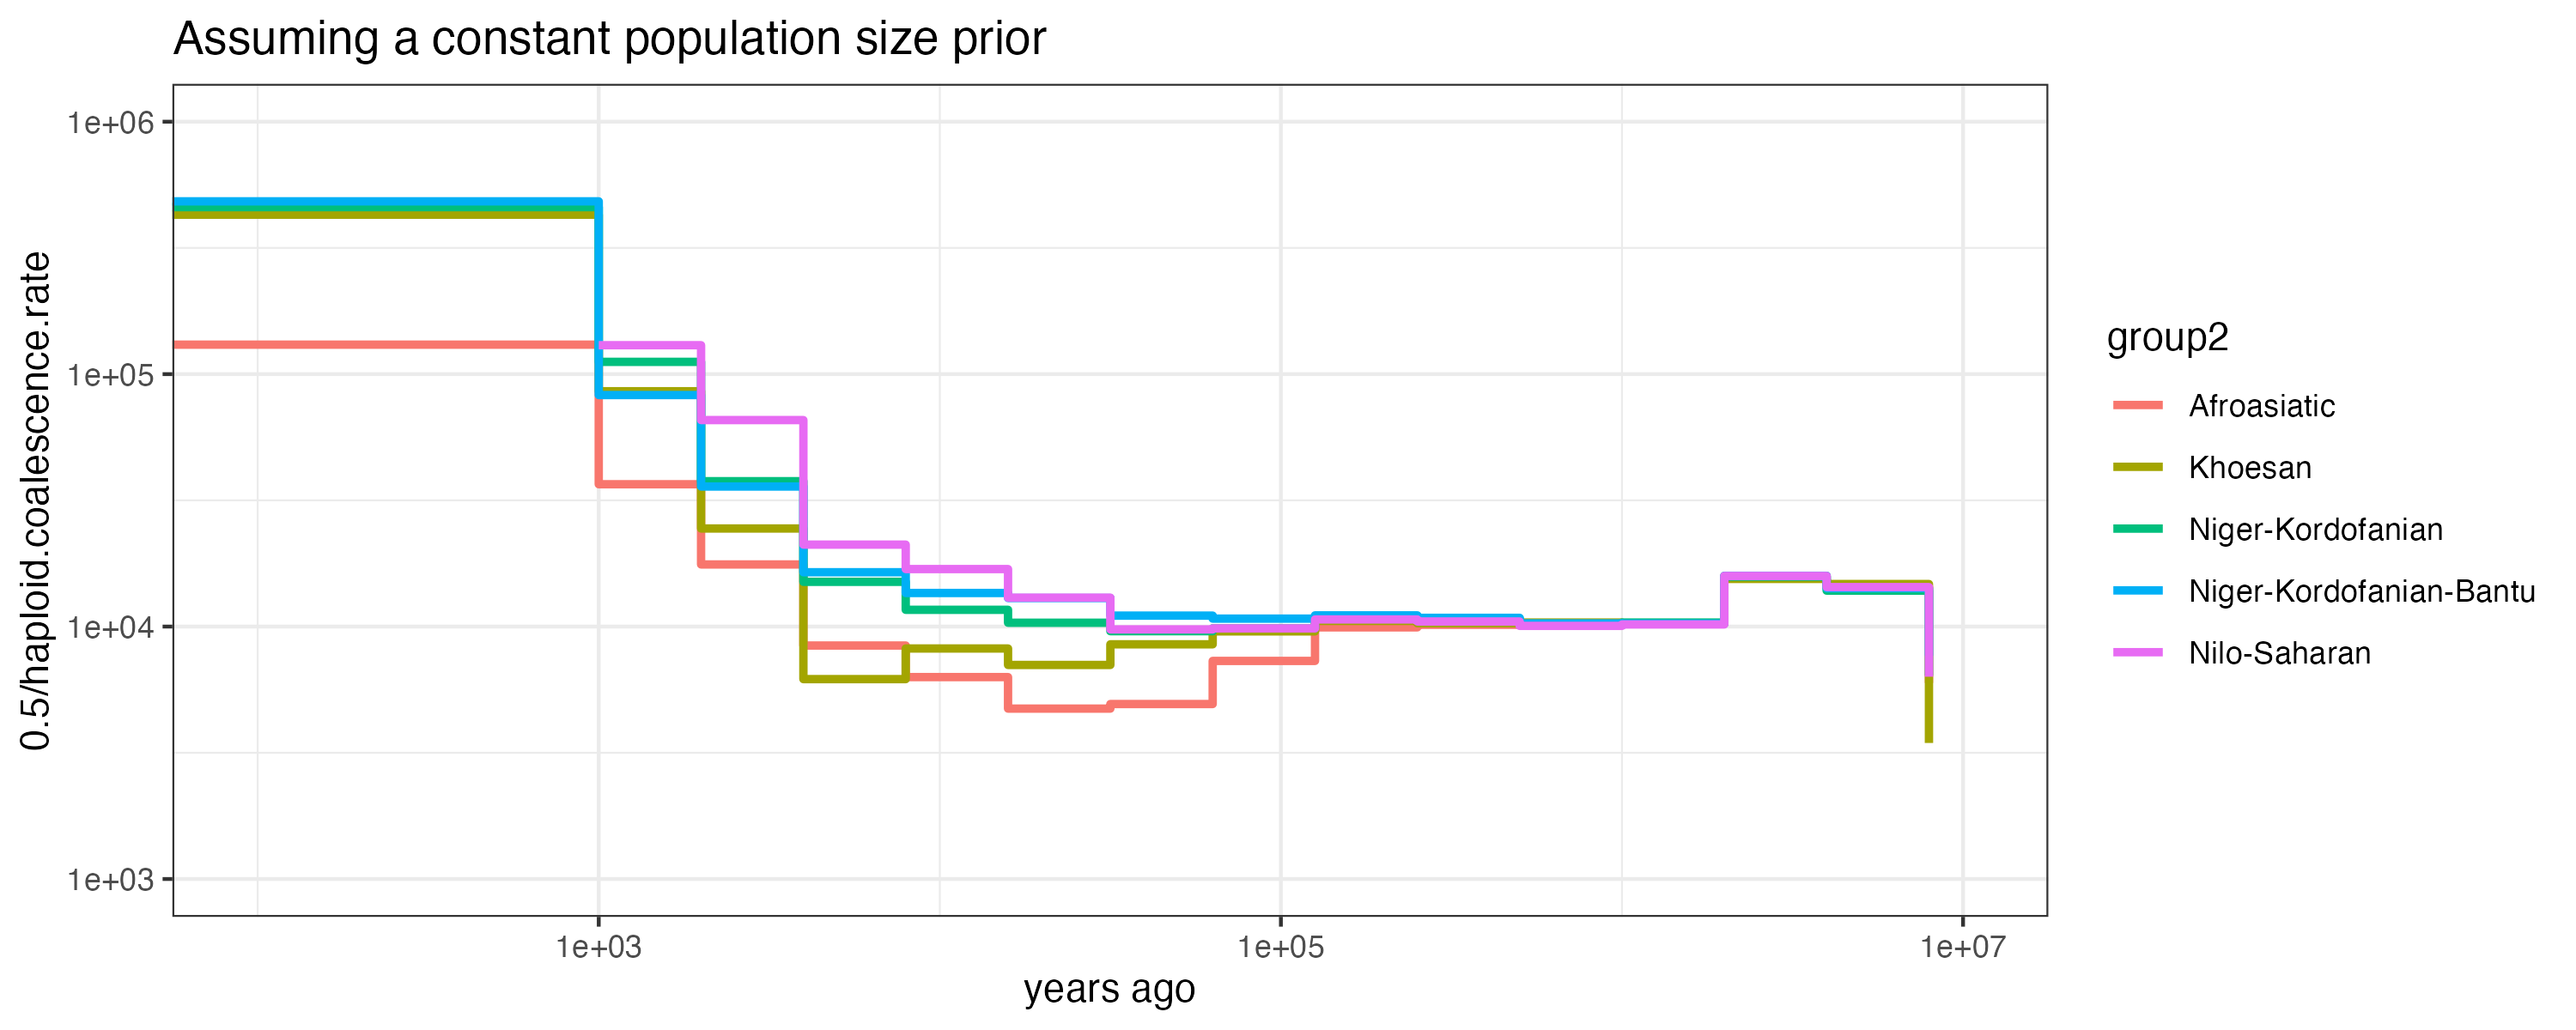

In [12]:
#display output
from IPython.display import Image
Image("plot_popsize_const.png")

<div class="alert alert-block alert-warning">
Can you describe how population sizes of groups speaking Afroasiatic languages differ from other
groups?
</div>

## Joint fitting of population size and branch lengths

So far, we used trees that assumed a pre-specified constant effective population size through time. This may not reflect the true underlying demographic history and bias tree branch lengths. Next, we use the EstimatePopulationSize.sh script to jointly fit effective population sizes and branch lengths.

In [13]:
%%bash
#Here we are stopping after 2 iterations, the default is to run this for 10 iterations
#This may take a few minutes

${PATH_TO_RELATE}/scripts/EstimatePopulationSize/EstimatePopulationSize.sh \
-i SGDP_Africa_chr15 \
-o SGDP_Africa_ne_chr15 \
--poplabels worksheet_data/SGDP_Africa_lang.poplabels \
-m 1.25e-8 \
--years_per_gen 28 \
--bins 3,7,0.3 \
--threads 2 \
--num_iter 1

********************************
Parameters passed to script:
input         = SGDP_Africa_chr15
poplabels     = worksheet_data/SGDP_Africa_lang.poplabels
mu            = 1.25e-8
years_per_gen = 28
output        = SGDP_Africa_ne_chr15
num_iter      = 1
bins          = 3,7,0.3
Maximum number of threads: 2
********************************
---------------------------------------------------------
Sampling branch lengths for SGDP_Africa_ne_chr15_tmp_chr0 ...
[100%]
CPU Time spent: 7.731354s; Max Memory usage: 382.718Mb.
---------------------------------------------------------

---------------------------------------------------------
Sampling branch lengths for SGDP_Africa_ne_chr15_tmp_chr1 ...
[100%]
CPU Time spent: 7.683222s; Max Memory usage: 376.205Mb.
---------------------------------------------------------

---------------------------------------------------------
Sampling branch lengths for SGDP_Africa_ne_chr15_tmp_chr2 ...
[100%]
CPU Time spent: 8.346675s; Max Memory usage: 393.76

---------------------------------------------------------
Extracting dist file from SGDP_Africa_chr15.mut ... 
CPU Time spent: 0.898644s; Max Memory usage: 1049.76Mb.
---------------------------------------------------------

---------------------------------------------------------
Removing trees with few mutations from SGDP_Africa_chr15.mut ... 
CPU Time spent: 9.522276s; Max Memory usage: 2264Mb.
---------------------------------------------------------

---------------------------------------------------------
Calculating coalescence rates for SGDP_Africa_ne_chr15...
[100%]
CPU Time spent: 1.994457s; Max Memory usage: 1114.16Mb.
---------------------------------------------------------

---------------------------------------------------------
Dividing .anc/.mut files into smaller files for parallelization...
CPU Time spent: 3.605299s; Max Memory usage: 1104.33Mb.
---------------------------------------------------------

---------------------------------------------------------
Co

<div class="alert alert-block alert-info">
If you have data for more than one chromosome, you can use the --chr argument to jointly fit population sizes genome-wide.<br/>
(see documentation
<a href="https://myersgroup.github.io/relate/modules.html#PopulationSizeScript">https://myersgroup.github.io/relate/modules.html#PopulationSizeScript</a>.)
</div>

### Plot jointly fitted coalescence rates

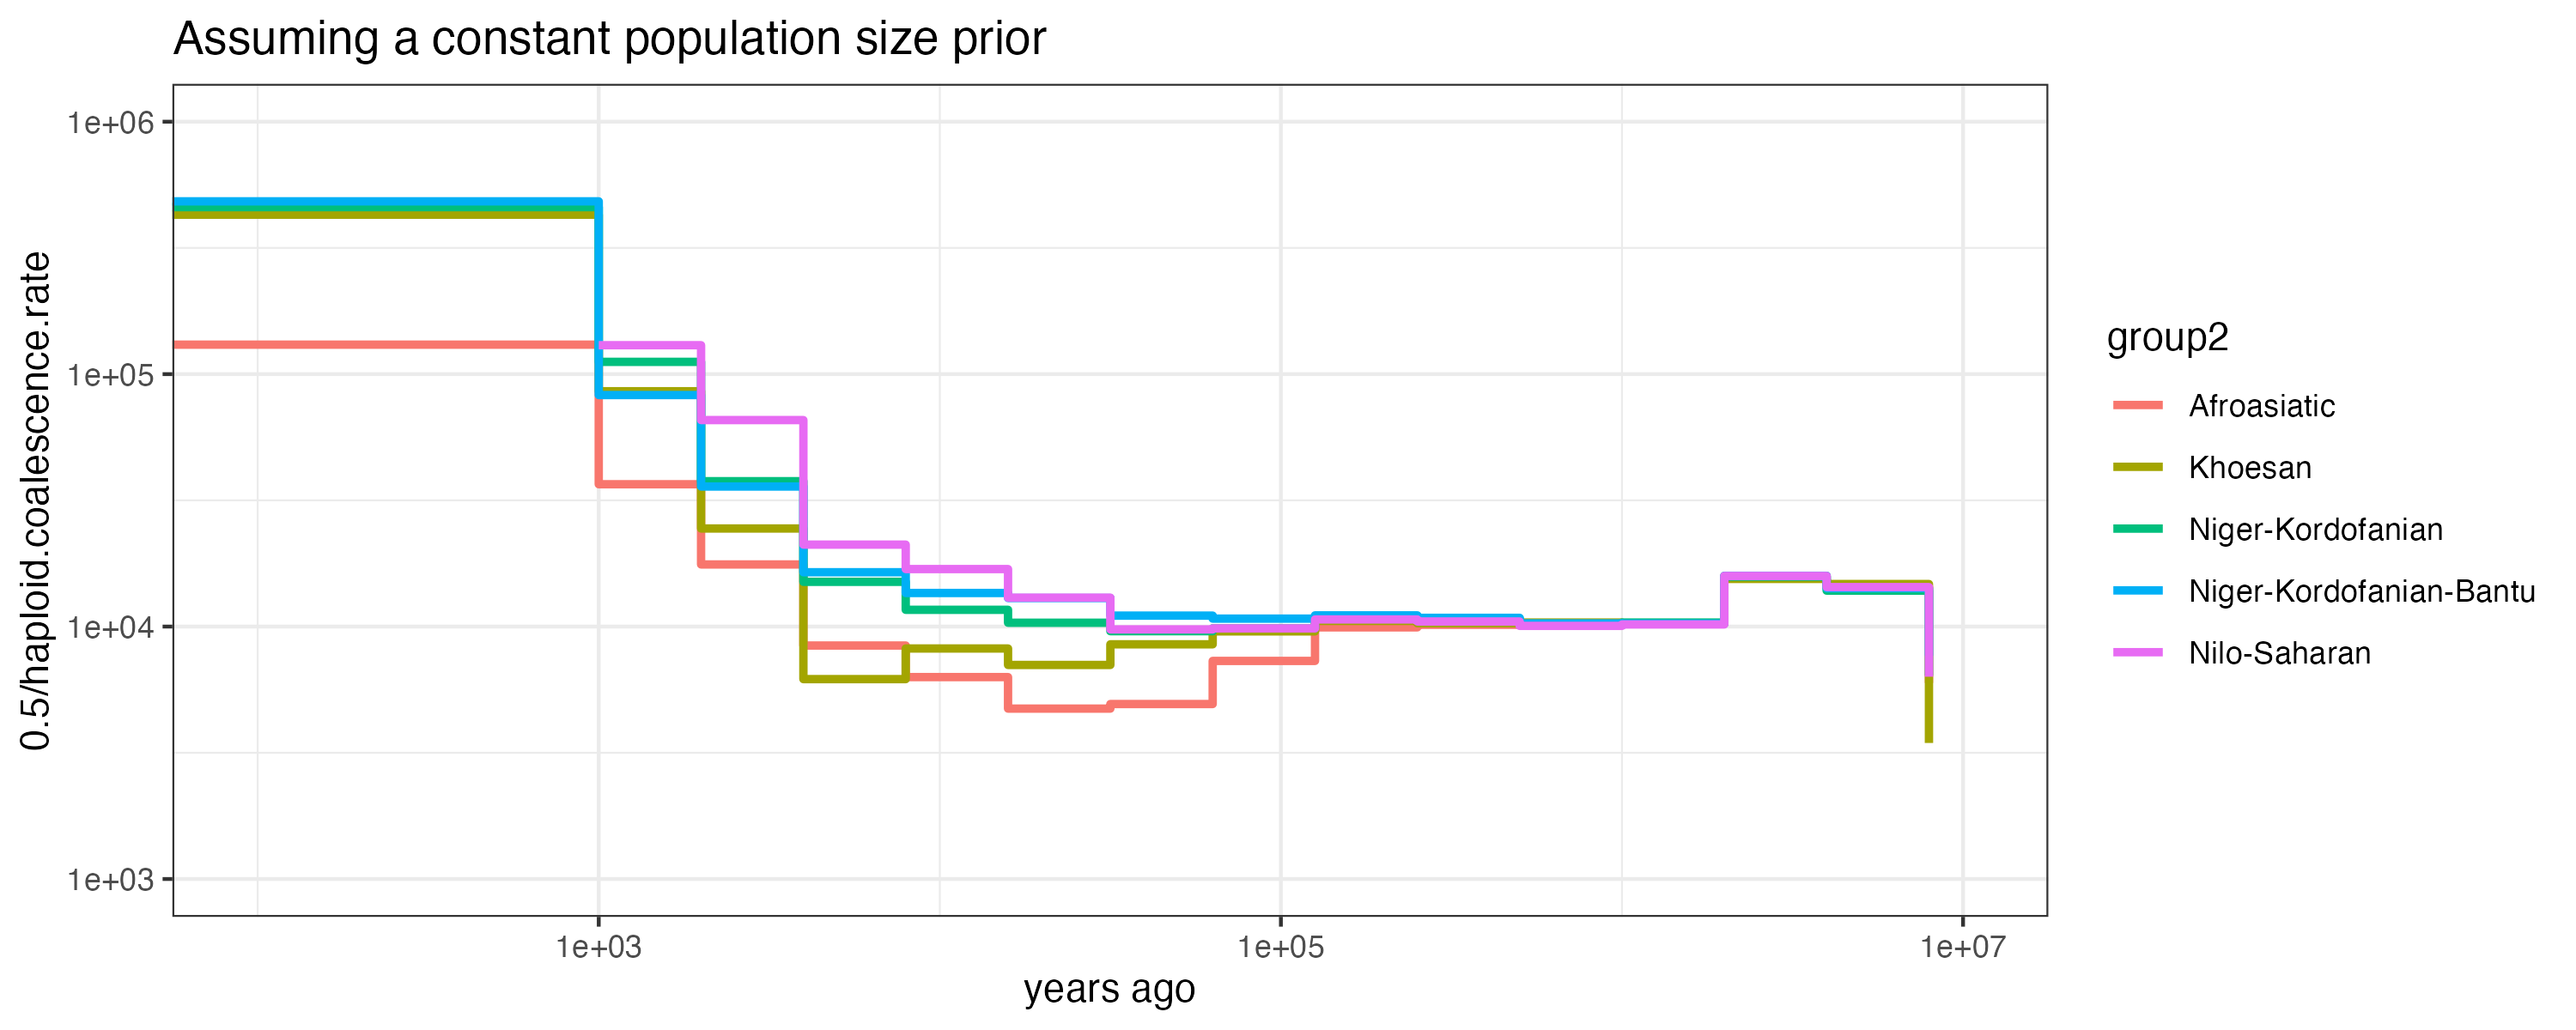

In [16]:
#display output
from IPython.display import Image
Image("plot_popsize_const.png")

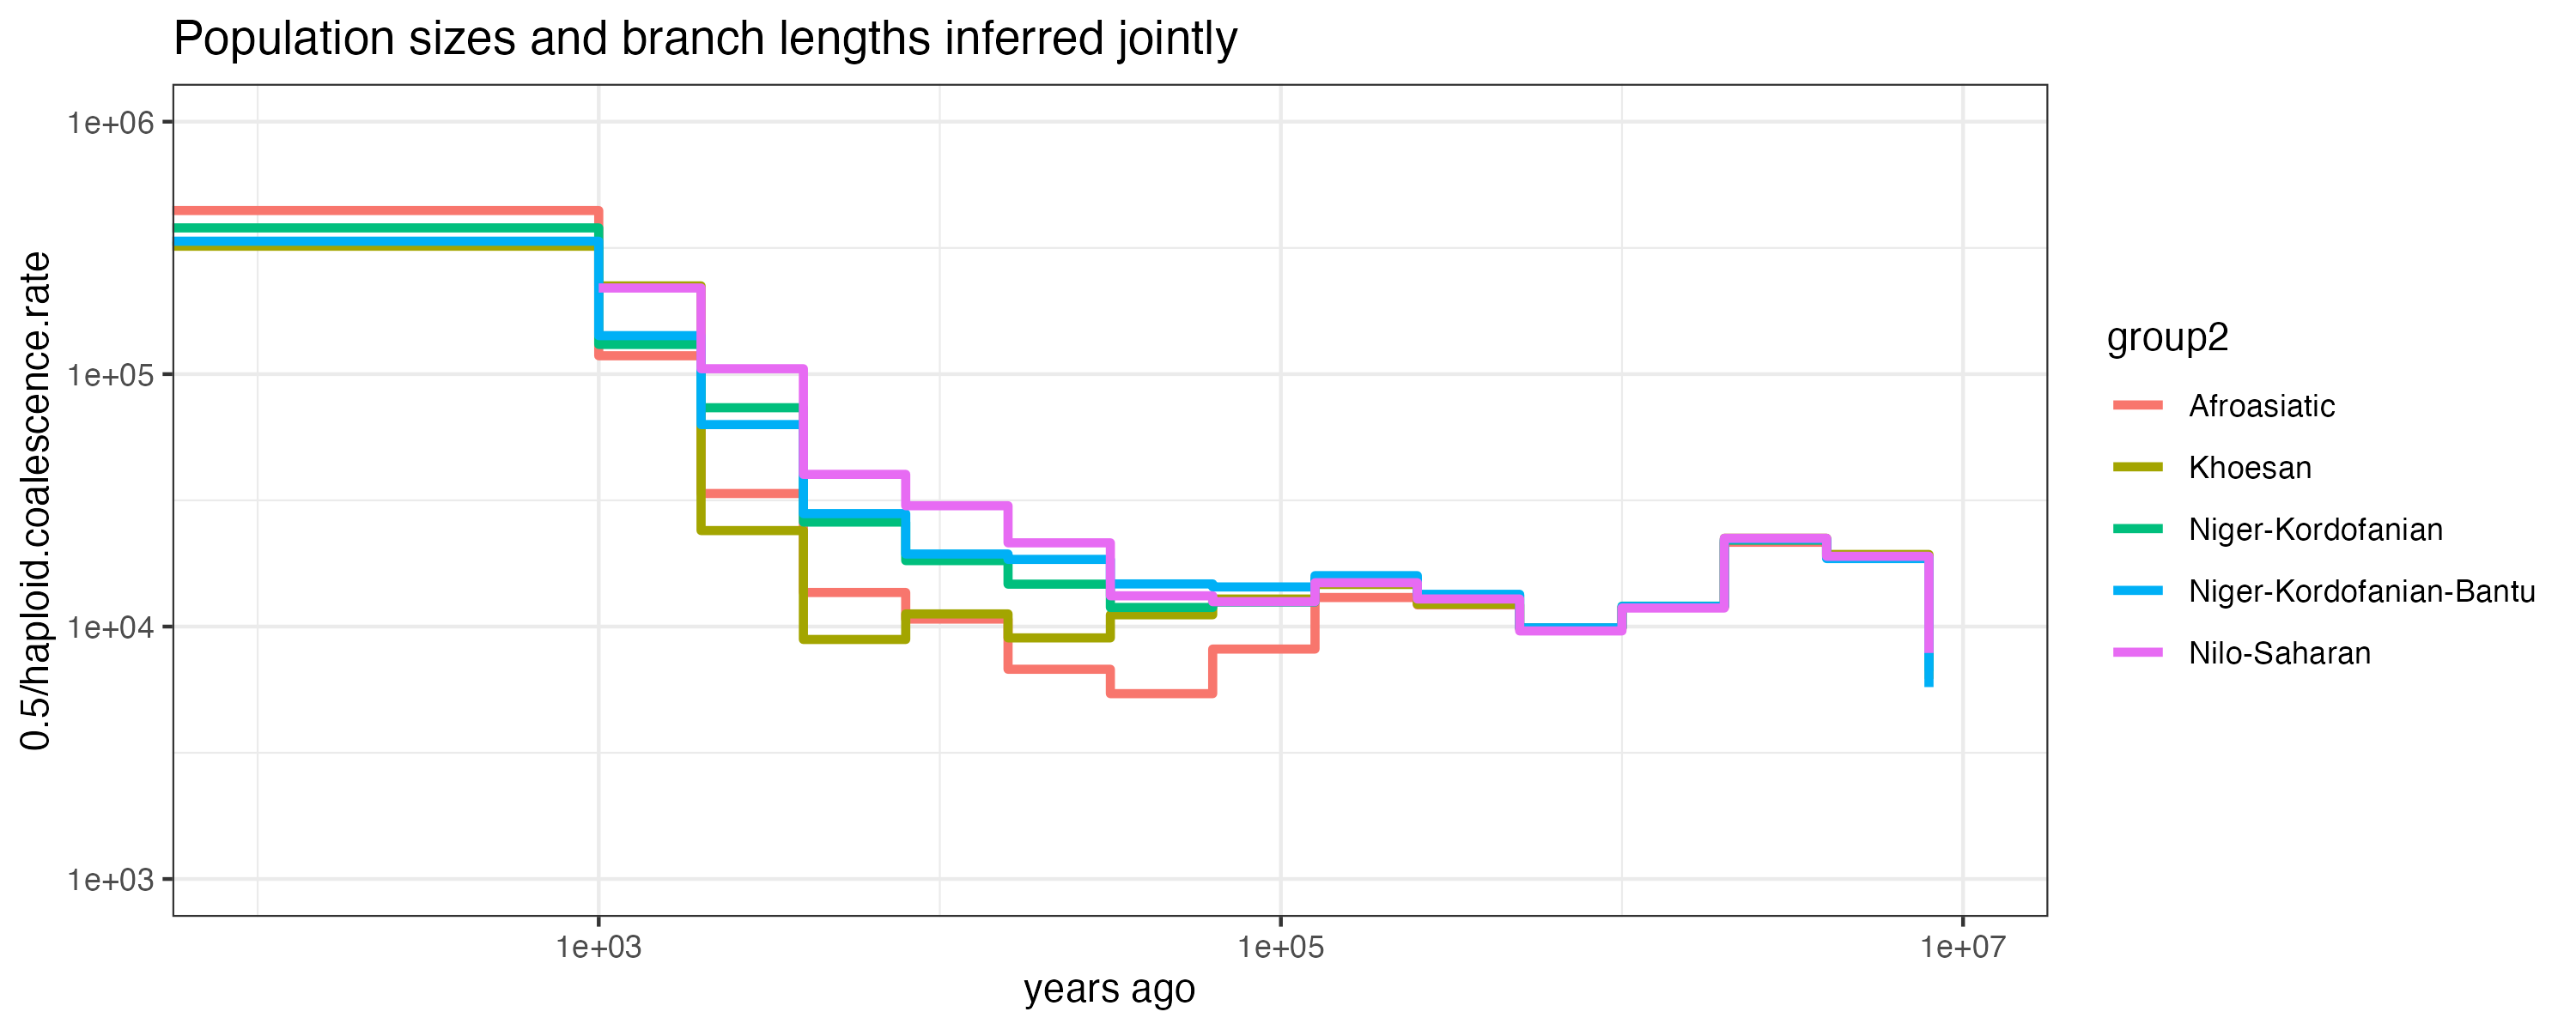

In [17]:
from IPython.display import Image
Image("plot_popsize_var.png")

<div class="alert alert-block alert-warning">
Can you compare the two plots? What do you think might happen is you run this for more iterations?
    
If you like, you can also plot rates between two groups, e.g. between Khoesan and everyone else to estimate when approximately these groups split.
</div>

## Plot structure at different time depths

In the above plot, we only plotted coalescence rates within groups. 

Next, we will look at coalescence rates between all pairs of individuals to quantify population structure. We first recalculate coalescence rates using a new poplabels file in which each individual belongs to its own group. We can do this quickly using the FinalizePopulationSize function as follows

In [18]:
%%bash
${PATH_TO_RELATE}/bin/RelateCoalescentRate --mode FinalizePopulationSize \
      -o SGDP_Africa_ne_chr15.pairwise \
      --poplabels ./worksheet_data/SGDP_Africa_ind.poplabels

---------------------------------------------------------
Finalizing coalescence rate...
CPU Time spent: 0.009528s; Max Memory usage: 3215.36Mb.
---------------------------------------------------------



Given this new coal file, we can now plot each epoch as an individuals x individuals matrix.

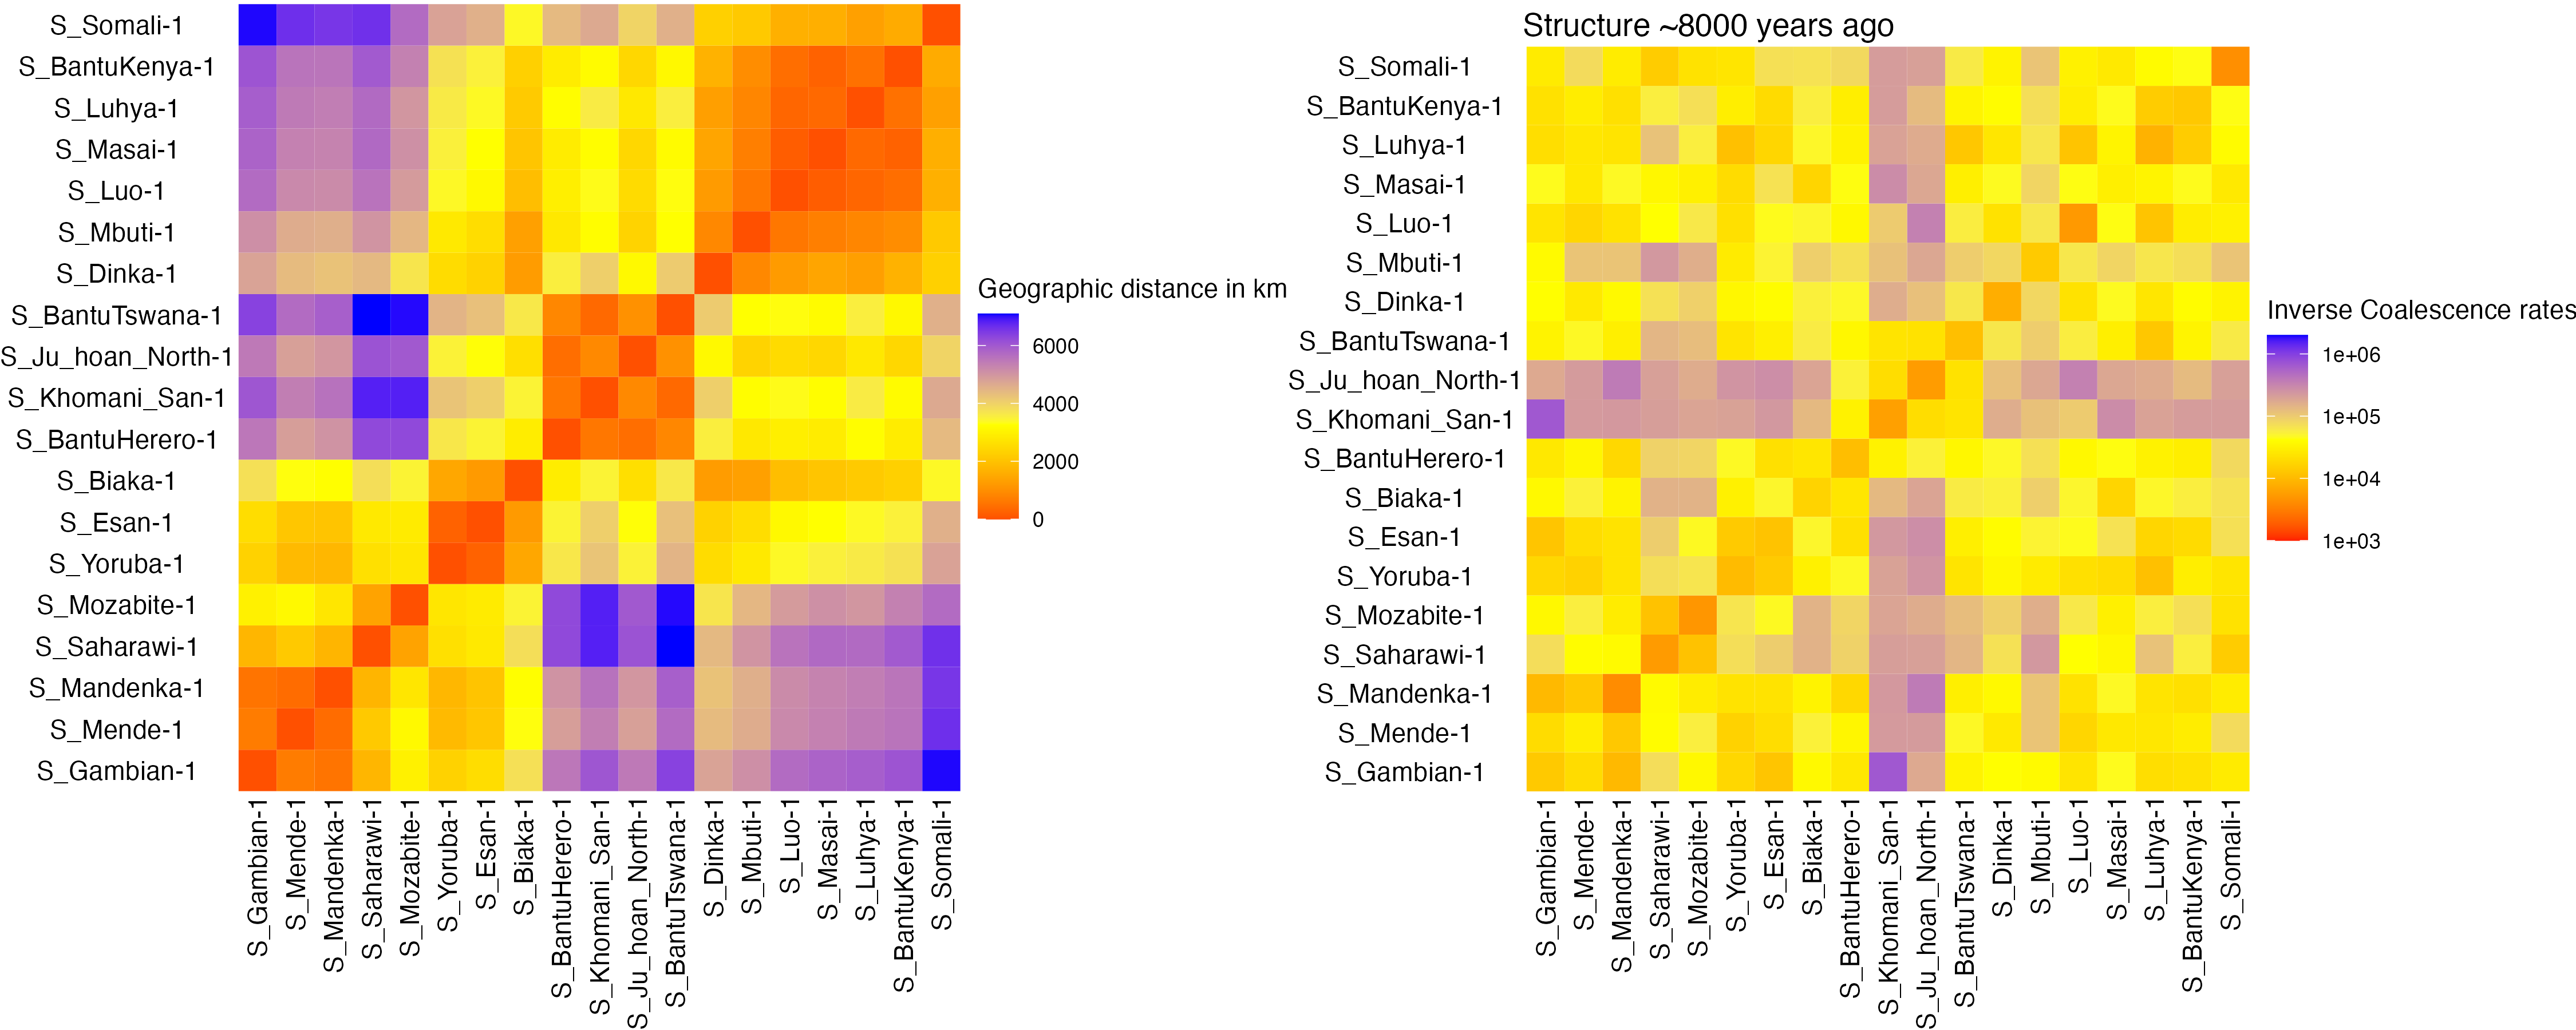

In [19]:
#display output
from IPython.display import Image
Image("SGDP_structure.png")

<div class="alert alert-block alert-warning">
Can you see a correlation between geography and genetics? Where do the two matrices differ? Can you plot this for different time periods? How does structure change over time?
</div>

## Detecting evidence for positive selection

Positive natural selection on a derived allele is expected to lead to this allele spreading rapidly in
a population, reflected in a burst of coalescence events. A well-known example is positive selection
of a variant associated with lighter skin pigmentation in Europe and South Asia. We have
implemented a simple statistic that captures such events and measures the extend to which a mutation
has out-competed other lineages.

To analyse selection, we will first apply functions provided with Relate to extract the relevant statistics,
and then use the R package relater to analyse the output.

### Calculate allele frequencies through time

In [20]:
%%bash
${PATH_TO_RELATE}/bin/RelateSelection \
--mode Frequency \
--bins 3,7,0.5 \
-i ./worksheet_data/WestEurasia/SGDP_WestEurasia_ne_chr15 \
-o SGDP_WestEurasia_ne_chr15

---------------------------------------------------------
Calculating frequency through time for ./worksheet_data/WestEurasia/SGDP_WestEurasia_ne_chr15.
CPU Time spent: 12.439067s; Max Memory usage: 1392.65Mb.
---------------------------------------------------------



### Calculate selection p-values given these frequencies

In [21]:
%%bash
${PATH_TO_RELATE}/bin/RelateSelection \
--mode Selection \
--bins 3,7,0.5 \
-i SGDP_WestEurasia_ne_chr15 \
-o SGDP_WestEurasia_ne_chr15

---------------------------------------------------------
Calculating evidence of selection for SGDP_WestEurasia_ne_chr15.
CPU Time spent: 4.954930s; Max Memory usage: 3.15392Mb.
---------------------------------------------------------



### Calculate quality scores of trees to filter out unreliable regions

In [22]:
%%bash
${PATH_TO_RELATE}/bin/RelateSelection \
--mode Quality \
-i ./worksheet_data/WestEurasia/SGDP_WestEurasia_ne_chr15 \
-o SGDP_WestEurasia_ne_chr15

---------------------------------------------------------
Annotating quality of SNPs for ./worksheet_data/WestEurasia/SGDP_WestEurasia_ne_chr15.
CPU Time spent: 9.836592s; Max Memory usage: 1324.61Mb.
---------------------------------------------------------



### Once we have generated these files, we use relater to analyse them in R

<div class="alert alert-block alert-warning">
The top SNP (see corresponding genealogy for West Eurasians below) is a well known target of positive selection, associated with lighter skin pigmentation.
</div>

![SLC24A5](figures/SGDP_WestEurasia_chr15_BP48426484.png)